In [ ]:
Simport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('02-14-2018.csv')

In [ ]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048574,443,6,14/02/2018 10:53:28,5807256,6,4,327,145,245,0,...,20,291569.0,0.0,291569,291569,5515650.0,0.0,5515650,5515650,Benign


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df.isnull().sum()

Dst Port                0
Protocol                0
Timestamp               0
Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          2277
Flow Pkts/s             0
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len          0
Fwd Pkts/s  

In [ ]:
df.isna().sum()

Dst Port                0
Protocol                0
Timestamp               0
Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          2277
Flow Pkts/s             0
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len          0
Fwd Pkts/s  

In [ ]:
(df==-np.inf).sum()

Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std

In [ ]:
(df==np.inf).sum()

Dst Port                0
Protocol                0
Timestamp               0
Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          1547
Flow Pkts/s          3824
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len          0
Fwd Pkts/s  

In [ ]:

df.describe()

C:\Users\SRINITHI\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\SRINITHI\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.046298e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,6.255555e+06,6.206622e+00,7.211191e+00,4.479936e+02,4.521803e+03,1.745736e+02,8.389535e+00,3.879579e+01,5.021107e+01,3.325241e+02,2.016587e+01,9.275989e+01,1.113899e+02,inf,inf,1.583948e+06,2.101497e+06,6.306042e+06,-1.519513e+06,5.944303e+06,1.775583e+06,2.147776e+06,6.081985e+06,-1.475314e+06,5.754843e+06,4.798110e+05,6.049147e+05,1.770279e+06,8.880474e+04,2.659419e-02,0.0,0.0,0.0,1.560079e+02,1.727050e+02,1.413886e+05,1.258575e+05,8.322709e+00,3.375417e+02,6.311424e+01,9.570919e+01,3.092890e+04,3.572467e-03,2.659419e-02,3.960422e-02,5.254312e-01,2.634699e-01,1.211463e-01,0.0,3.960327e-02,6.634537e-01,7.144445e+01,3.879579e+01,9.275989e+01,0.0,0.0,0.0,0.0,0.0,0.0,6.206622e+00,4.479936e+02,7.211191e+00,4.521803e+03,1.050166e+04,6.142295e+03,2.793536e+00,2.327970e+01,5.152449e+04,2.136151e+04,8.789157e+04,3.995477e+04,3.101206e+06,7.297218e+05,4.812391e+06,2.126920e+06
std,1.444344e+04,4.460625e+00,1.260291e+09,4.447851e+01,1.048682e+02,1.573541e+04,1.515021e+05,2.876713e+02,1.948279e+01,5.331882e+01,8.518887e+01,4.938587e+02,4.653823e+01,1.579997e+02,1.860082e+02,NaN,NaN,3.332477e+08,7.332938e+08,1.530125e+09,1.640806e+09,1.260287e+09,3.332505e+08,7.332951e+08,1.530123e+09,1.640806e+09,2.257935e+07,2.291242e+06,2.612809e+06,7.985050e+06,1.690612e+06,1.608943e-01,0.0,0.0,0.0,1.078119e+03,2.103964e+03,3.085265e+05,2.670306e+05,1.890669e+01,5.023828e+02,1.007340e+02,1.475421e+02,1.170697e+05,5.966329e-02,1.608943e-01,1.950276e-01,4.993531e-01,4.405153e-01,3.262974e-01,0.0,1.950254e-01,5.652833e-01,1.051520e+02,5.331882e+01,1.579997e+02,0.0,0.0,0.0,0.0,0.0,0.0,4.447851e+01,1.573541e+04,1.048682e+02,1.515021e+05,1.293709e+04,1.814980e+04,5.557106e+00,1.106185e+01,5.815586e+05,2.186405e+05,7.395725e+05,5.602693e+05,5.414780e+08,3.820031e+08,1.522117e+09,1.817013e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

In [ ]:
df['Label'].value_counts()

Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64

In [ ]:
type(df['Flow Byts/s'])

pandas.core.series.Series

In [ ]:
df['Flow Byts/s'] = pd.to_numeric(df['Flow Byts/s'], errors='coerce')
df['Flow Pkts/s'] = pd.to_numeric(df['Flow Pkts/s'], errors='coerce')


In [ ]:
np.isinf(df['Flow Byts/s']).sum()

np.int64(1547)

In [ ]:
np.isinf(df['Flow Pkts/s']).sum()

np.int64(3824)

In [ ]:
df.shape

(1048575, 80)

In [ ]:
df=df.replace([np.inf,-np.inf],np.nan)
df=df.dropna(subset=['Flow Byts/s'])

In [ ]:
df=df.replace([np.inf,-np.inf],np.nan)
df=df.dropna(subset=['Flow Pkts/s'])

In [ ]:
df.isna().sum()

Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std

In [ ]:
np.isinf(df['Flow Pkts/s']).sum()

np.int64(0)

In [ ]:
np.isinf(df['Flow Byts/s']).sum()

np.int64(0)

In [ ]:
df['Flow Pkts/s'].shape

(1044751,)

In [ ]:
df.shape

(1044751, 80)

In [ ]:
df['Flow Pkts/s'].dtype

dtype('float64')

In [ ]:
drop_cols=['Dst Port', 'Protocol', 'Timestamp', 'Fwd URG Flags', 'Bwd URG Flags',
             'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Header Len', 'Bwd Header Len',
             'Fwd PSH Flags', 'Bwd PSH Flags', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
             'Fwd Byts/b Avg', 'Bwd Byts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Blk Rate Avg']

In [ ]:
# Clean column names in df
df.columns = df.columns.str.replace('\xa0', ' ').str.strip()

# Clean drop_cols
drop_cols = [col.replace('\xa0', ' ').strip() for col in drop_cols]

# Drop only existing columns
df = df.drop(columns=[col for col in drop_cols if col in df.columns], axis=1)


In [ ]:
for v in df:
  print(v,df[v].dtype)

Flow Duration int64
Tot Fwd Pkts int64
Tot Bwd Pkts int64
TotLen Fwd Pkts int64
TotLen Bwd Pkts int64
Fwd Pkt Len Max int64
Fwd Pkt Len Min int64
Fwd Pkt Len Mean float64
Fwd Pkt Len Std float64
Bwd Pkt Len Max int64
Bwd Pkt Len Min int64
Bwd Pkt Len Mean float64
Bwd Pkt Len Std float64
Flow Byts/s float64
Flow Pkts/s float64
Flow IAT Mean float64
Flow IAT Std float64
Flow IAT Max int64
Flow IAT Min int64
Fwd IAT Tot int64
Fwd IAT Mean float64
Fwd IAT Std float64
Fwd IAT Max int64
Fwd IAT Min int64
Bwd IAT Tot int64
Bwd IAT Mean float64
Bwd IAT Std float64
Bwd IAT Max int64
Bwd IAT Min int64
Fwd Pkts/s float64
Bwd Pkts/s float64
Pkt Len Min int64
Pkt Len Max int64
Pkt Len Mean float64
Pkt Len Std float64
Pkt Len Var float64
FIN Flag Cnt int64
SYN Flag Cnt int64
RST Flag Cnt int64
PSH Flag Cnt int64
ACK Flag Cnt int64
URG Flag Cnt int64
Down/Up Ratio int64
Pkt Size Avg float64
Fwd Seg Size Avg float64
Bwd Seg Size Avg float64
Fwd Pkts/b Avg int64
Bwd Pkts/b Avg int64
Subflow Fwd Pkts in

In [ ]:
target=df['Label']

In [ ]:
df=df.apply(pd.to_numeric,errors='coerce')
df.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/b Avg,Bwd Pkts/b Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,139.300036,56320958,56320761,112641719,5.632086e+07,139.300036,56320958,56320761,0,0.000000,0.000000,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,3,0,0,0,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,NaN
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,114.551299,56320814,56320652,112641466,5.632073e+07,114.551299,56320814,56320652,0,0.000000,0.000000,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,3,0,0,0,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,NaN
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,301.934596,56319525,56319098,112638623,5.631931e+07,301.934596,56319525,56319098,0,0.000000,0.000000,0,0,0.026634,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,3,0,0,0,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,NaN
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,247443.778966,673900,22,6453966,4.609976e+05,123109.423588,673900,229740,5637902,626433.555556,455082.214224,1167293,554,2.324152,1.549435,0,976,135.076923,277.834760,77192.153846,0,0,0,1,0,0,0,140.48,82.600000,227.300000,0,0,15,1239,10,2273,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,NaN
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,511356.609733,1928102,21,8804066,6.772358e+05,532416.970959,1928102,246924,7715481,771548.100000,755543.082717,2174893,90,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,134.08,81.642857,200.818182,0,0,14,1143,11,2209,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,NaN


In [ ]:
df=df.drop(columns='Label',axis=1)

In [ ]:
for v in df:
  print(v,df[v].dtype)

Flow Duration int64
Tot Fwd Pkts int64
Tot Bwd Pkts int64
TotLen Fwd Pkts int64
TotLen Bwd Pkts int64
Fwd Pkt Len Max int64
Fwd Pkt Len Min int64
Fwd Pkt Len Mean float64
Fwd Pkt Len Std float64
Bwd Pkt Len Max int64
Bwd Pkt Len Min int64
Bwd Pkt Len Mean float64
Bwd Pkt Len Std float64
Flow Byts/s float64
Flow Pkts/s float64
Flow IAT Mean float64
Flow IAT Std float64
Flow IAT Max int64
Flow IAT Min int64
Fwd IAT Tot int64
Fwd IAT Mean float64
Fwd IAT Std float64
Fwd IAT Max int64
Fwd IAT Min int64
Bwd IAT Tot int64
Bwd IAT Mean float64
Bwd IAT Std float64
Bwd IAT Max int64
Bwd IAT Min int64
Fwd Pkts/s float64
Bwd Pkts/s float64
Pkt Len Min int64
Pkt Len Max int64
Pkt Len Mean float64
Pkt Len Std float64
Pkt Len Var float64
FIN Flag Cnt int64
SYN Flag Cnt int64
RST Flag Cnt int64
PSH Flag Cnt int64
ACK Flag Cnt int64
URG Flag Cnt int64
Down/Up Ratio int64
Pkt Size Avg float64
Fwd Seg Size Avg float64
Bwd Seg Size Avg float64
Fwd Pkts/b Avg int64
Bwd Pkts/b Avg int64
Subflow Fwd Pkts in

In [ ]:
target.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [ ]:
# Convert "Benign" to 0 and all attacks to 1

target = target.apply(lambda x: 0 if x == "Benign" else 1)


In [ ]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [ ]:
target.tail()

1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: Label, dtype: int64

In [ ]:
target.value_counts()

Label
0    663808
1    380943
Name: count, dtype: int64

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df[df.columns]=scaler.fit_transform(df[df.columns])

In [ ]:
df.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Pkts/b Avg,Bwd Pkts/b Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.999992,0.000391,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,6.915719e-09,0.999813,3.281710e-10,0.140003,0.999933,0.999992,0.999813,3.281710e-10,0.140003,0.999933,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.658279e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000391,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000166,5.726192e-10,0.000057,0.004469
1,0.999992,0.000391,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,6.915734e-09,0.999813,2.698665e-10,0.140003,0.999933,0.999992,0.999813,2.698665e-10,0.140003,0.999933,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.658294e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000391,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000166,4.708848e-10,0.000057,0.004469
2,0.999992,0.000391,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,6.915902e-09,0.999813,7.113149e-10,0.140003,0.999933,0.999992,0.999813,7.113149e-10,0.140003,0.999933,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.658462e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000391,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000166,1.241159e-09,0.000057,0.004469
3,0.999876,0.002738,0.001087,0.000144,0.000170,0.011546,0.0,0.007364,0.012483,0.668493,0.0,0.155766,0.393437,1.222148e-06,9.686542e-07,0.999649,5.829423e-07,0.139954,0.999873,0.999876,0.999649,2.900283e-07,0.139954,0.999873,0.046983,0.005246,0.005387,0.009763,4.639853e-06,5.810381e-07,7.747174e-07,0.0,0.015146,0.053578,0.031534,0.000994,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.055699,0.007364,0.155766,0.0,0.0,0.002738,0.000144,0.001087,0.000170,0.00582,0.666667,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
4,0.999879,0.002542,0.001196,0.000133,0.000165,0.011546,0.0,0.007278,0.012927,0.668493,0.0,0.137618,0.383457,8.550998e-07,7.101567e-07,0.999649,1.204683e-06,0.139955,0.999873,0.999879,0.999650,1.254298e-06,0.139955,0.999873,0.064296,0.006462,0.008944,0.018190,7.537668e-07,3.975436e-07,6.247114e-07,0.0,0.015146,0.051137,0.031752,0.001008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.053161,0.007278,0.137618,0.0,0.0,0.002542,0.000133,0.001196,0.000165,0.00582,0.666667,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
pip install tensorflow --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Split data into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Reshape data for CNN (samples, timesteps, features)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert labels to categorical (binary classification)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# =====================
# 1. DNN Implementation
# =====================
def build_dnn(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(2, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])
    return model

# Build and train DNN
dnn_model = build_dnn(X_train.shape[1])
history_dnn = dnn_model.fit(X_train, y_train,
                          epochs=30,
                          batch_size=128,
                          validation_split=0.2,
                          callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
                          verbose=1)

# Evaluate DNN
dnn_loss, dnn_acc, dnn_precision, dnn_recall = dnn_model.evaluate(X_test, y_test)
print(f"\nDNN Results:")
print(f"Accuracy: {dnn_acc*100:.2f}%")
print(f"Precision: {dnn_precision*100:.2f}%")
print(f"Recall: {dnn_recall*100:.2f}%")

# =====================
# 2. CNN Implementation
# =====================
def build_cnn(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.4),

        Flatten(),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(2, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])
    return model

# Build and train CNN
cnn_model = build_cnn((X_train.shape[1], 1))
history_cnn = cnn_model.fit(X_train_cnn, y_train,
                          epochs=30,
                          batch_size=128,
                          validation_split=0.2,
                          callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
                          verbose=1)

# Evaluate CNN
cnn_loss, cnn_acc, cnn_precision, cnn_recall = cnn_model.evaluate(X_test_cnn, y_test)
print(f"\nCNN Results:")
print(f"Accuracy: {cnn_acc*100:.2f}%")
print(f"Precision: {cnn_precision*100:.2f}%")
print(f"Recall: {cnn_recall*100:.2f}%")

# =====================
# 3. Evaluation Metrics
# =====================
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_history(history_dnn, "DNN")
plot_history(history_cnn, "CNN")

# Classification reports
def print_report(model, X, y_true, model_name):
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    print(f"\n{classification_report(y_true_classes, y_pred_classes)}")
    print(f"\nConfusion Matrix ({model_name}):")
    print(confusion_matrix(y_true_classes, y_pred_classes))

print_report(dnn_model, X_test, y_test, "DNN")
print_report(cnn_model, X_test_cnn, y_test, "CNN")

C:\Users\SRINITHI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9822 - auc: 0.9952 - loss: 0.0535 - precision: 0.9651 - recall: 0.9902 - val_accuracy: 0.9992 - val_auc: 0.9994 - val_loss: 0.0054 - val_precision: 0.9978 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.9993 - auc: 0.9999 - loss: 0.0025 - precision: 0.9987 - recall: 0.9995 - val_accuracy: 0.9992 - val_auc: 1.0000 - val_loss: 0.0017 - val_precision: 0.9978 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.9994 - auc: 1.0000 - loss: 0.0019 - precision: 0.9990 - recall: 0.9994 - val_accuracy: 0.9998 - val_auc: 1.0000 - val_loss: 7.6907e-04 - val_precision: 0.9999 - val_recall: 0.9996 - learning_rate: 0.0010
Epoch 4/50
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.9996 - auc: 1.0000 - loss: 0.0015 - precision: 0.9993 - recall: 0.9996 - val_accuracy: 0.9996 - val_auc: 0.9999 - va

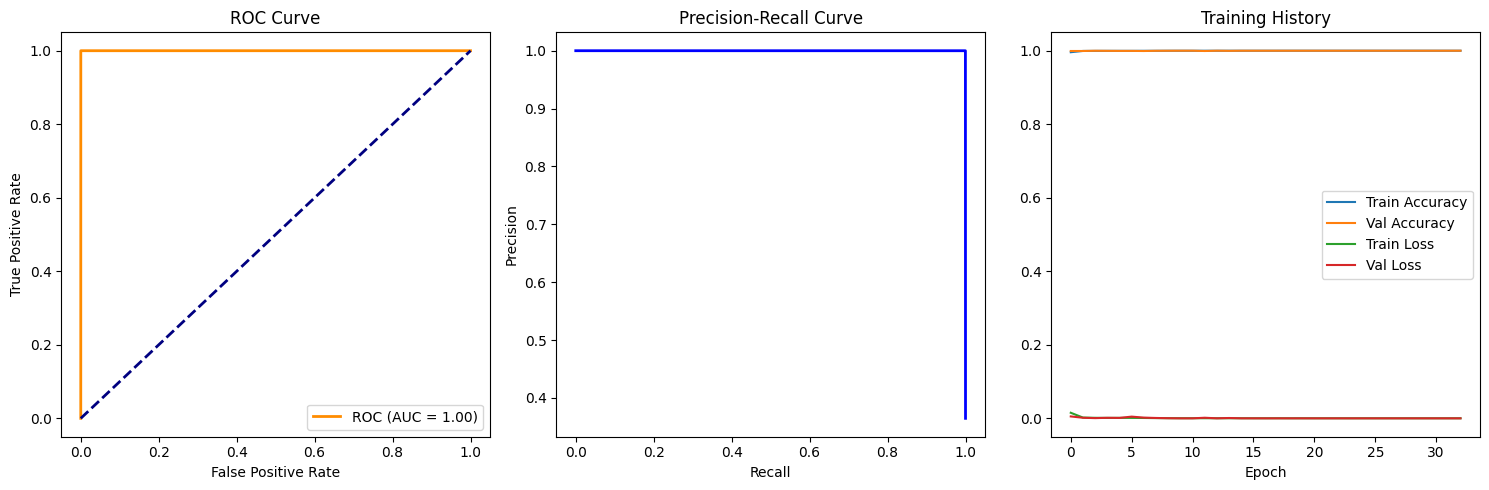

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you already have preprocessed X_train, X_test, y_train, y_test
# If not, uncomment and adapt the following lines:
X_train, X_test, y_train, y_test = train_test_split(
    df, target, test_size=0.2, random_state=42, stratify=target
)

# Build MLP model
def create_mlp_model(input_shape):
    model = Sequential([
        # Input layer
        Dense(128, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden layers
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),

        # Output layer (binary classification)
        Dense(1, activation='sigmoid')
    ])
    return model

# Create model
model = create_mlp_model((X_train.shape[1],))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
test_results = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Metrics:")
print(f"Loss: {test_results[0]:.4f}")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"Precision: {test_results[2]:.4f}")
print(f"Recall: {test_results[3]:.4f}")
print(f"AUC: {test_results[4]:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_probs = model.predict(X_test).ravel()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Training History
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming your preprocessed data is in shape (samples, features)
# We need to reshape it for RNN to (samples, timesteps, features)
# For this example, we'll use 1 timestep (can adjust based on your needs)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build RNN model
def create_rnn_model(input_shape):
    model = Sequential([
        # RNN layer
        SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        # Second RNN layer
        SimpleRNN(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.2),

        # Dense layers
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),

        # Output layer
        Dense(1, activation='sigmoid')
    ])
    return model

# Create model
model = create_rnn_model((X_train_rnn.shape[1], X_train_rnn.shape[2]))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

# Train the model
print("Training RNN model...")
history = model.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
test_results = model.evaluate(X_test_rnn, y_test, verbose=0)
print("\nTest Metrics:")
print(f"Loss: {test_results[0]:.4f}")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"Precision: {test_results[2]:.4f}")
print(f"Recall: {test_results[3]:.4f}")
print(f"AUC: {test_results[4]:.4f}")

# Generate predictions
y_pred = (model.predict(X_test_rnn) > 0.5).astype("int32")
y_probs = model.predict(X_test_rnn).ravel()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNN ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RNN Precision-Recall Curve')

# Training History
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Training History')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'reshape'

C:\Users\SRINITHI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training RNN model...
Epoch 1/50
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 58s 26ms/step - accuracy: 0.9711 - auc: 0.9915 - loss: 0.0736 - precision: 0.9451 - recall: 0.9832 - val_accuracy: 0.9989 - val_auc: 0.9994 - val_loss: 0.0061 - val_precision: 0.9969 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9992 - auc: 0.9999 - loss: 0.0032 - precision: 0.9983 - recall: 0.9994 - val_accuracy: 0.9497 - val_auc: 0.9982 - val_loss: 0.1033 - val_precision: 0.8788 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.9994 - auc: 1.0000 - loss: 0.0019 - precision: 0.9990 - recall: 0.9994 - val_accuracy: 0.9992 - val_auc: 1.0000 - val_loss: 0.0023 - val_precision: 0.9978 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.9994 - auc: 0.9999 - loss: 0.0019 - precision: 0.9990 - recall: 0.9994 - val_accuracy: 0.9998 - va

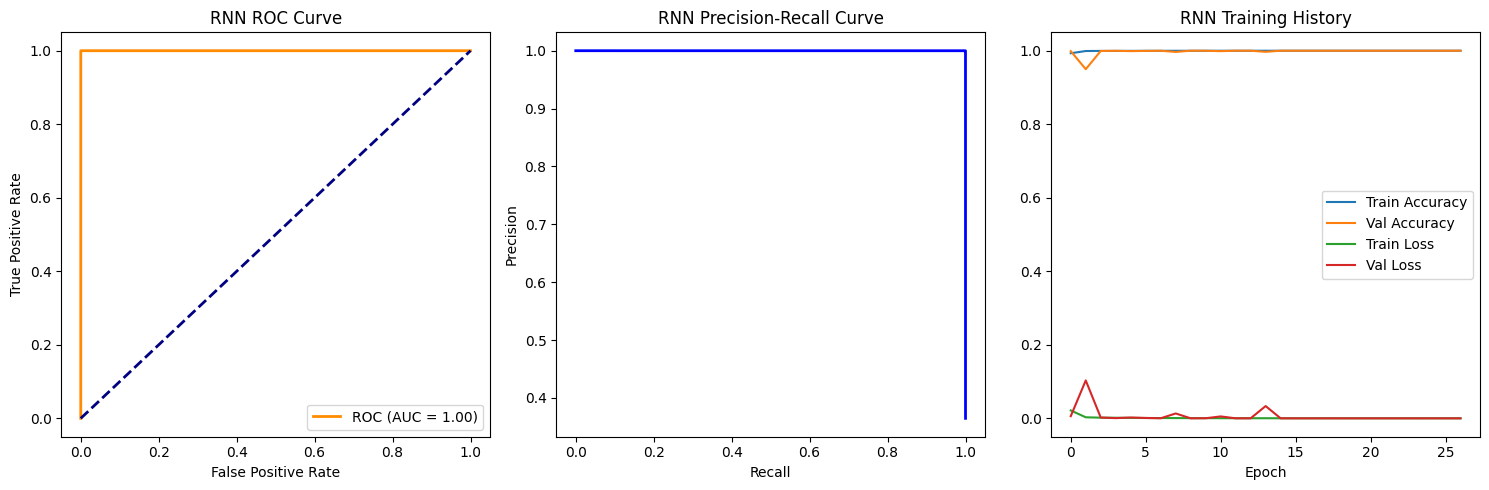

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Convert DataFrame to numpy arrays
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape for RNN (samples, timesteps=1, features)
X_train_rnn = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_test_rnn = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])

# Build RNN model
def create_rnn_model(input_shape):
    model = Sequential([
        # First RNN layer
        SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        # Second RNN layer
        SimpleRNN(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.2),

        # Dense layer
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),

        # Output layer
        Dense(1, activation='sigmoid')
    ])
    return model

# Create model
model = create_rnn_model((X_train_rnn.shape[1], X_train_rnn.shape[2]))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

# Train the model
print("Training RNN model...")
history = model.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
test_results = model.evaluate(X_test_rnn, y_test, verbose=0)
print("\nTest Metrics:")
print(f"Loss: {test_results[0]:.4f}")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"Precision: {test_results[2]:.4f}")
print(f"Recall: {test_results[3]:.4f}")
print(f"AUC: {test_results[4]:.4f}")

# Generate predictions
y_pred = (model.predict(X_test_rnn) > 0.5).astype("int32")
y_probs = model.predict(X_test_rnn).ravel()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNN ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RNN Precision-Recall Curve')

# Training History
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Training History')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\SRINITHI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
9142/9142 ━━━━━━━━━━━━━━━━━━━━ 134s 13ms/step - accuracy: 0.9920 - loss: 0.0241 - precision: 0.9839 - recall: 0.9949 - val_accuracy: 0.9990 - val_loss: 0.0022 - val_precision: 0.9974 - val_recall: 1.0000
Epoch 2/30
9142/9142 ━━━━━━━━━━━━━━━━━━━━ 113s 12ms/step - accuracy: 0.9991 - loss: 0.0027 - precision: 0.9981 - recall: 0.9993 - val_accuracy: 0.9995 - val_loss: 0.0012 - val_precision: 0.9989 - val_recall: 0.9998
Epoch 3/30
9142/9142 ━━━━━━━━━━━━━━━━━━━━ 109s 12ms/step - accuracy: 0.9995 - loss: 0.0018 - precision: 0.9994 - recall: 0.9993 - val_accuracy: 0.9997 - val_loss: 8.8181e-04 - val_precision: 0.9999 - val_recall: 0.9994
Epoch 4/30
9142/9142 ━━━━━━━━━━━━━━━━━━━━ 110s 12ms/step - accuracy: 0.9997 - loss: 0.0012 - precision: 0.9996 - recall: 0.9994 - val_accuracy: 0.9997 - val_loss: 8.1470e-04 - val_precision: 0.9999 - val_recall: 0.9994
Epoch 5/30
9142/9142 ━━━━━━━━━━━━━━━━━━━━ 110s 12ms/step - accuracy: 0.9997 - loss: 0.0012 - precision: 0.9996 - recall: 0.9996 - va

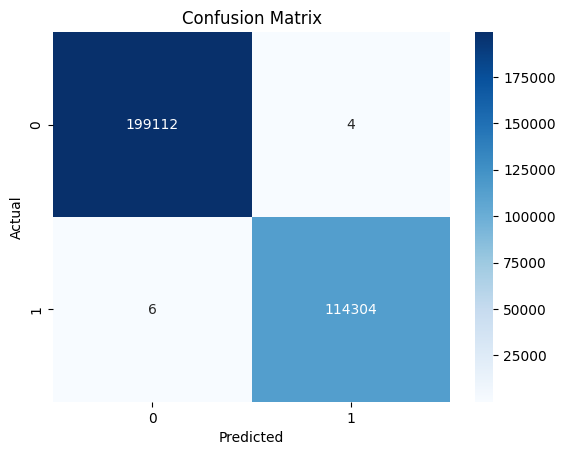

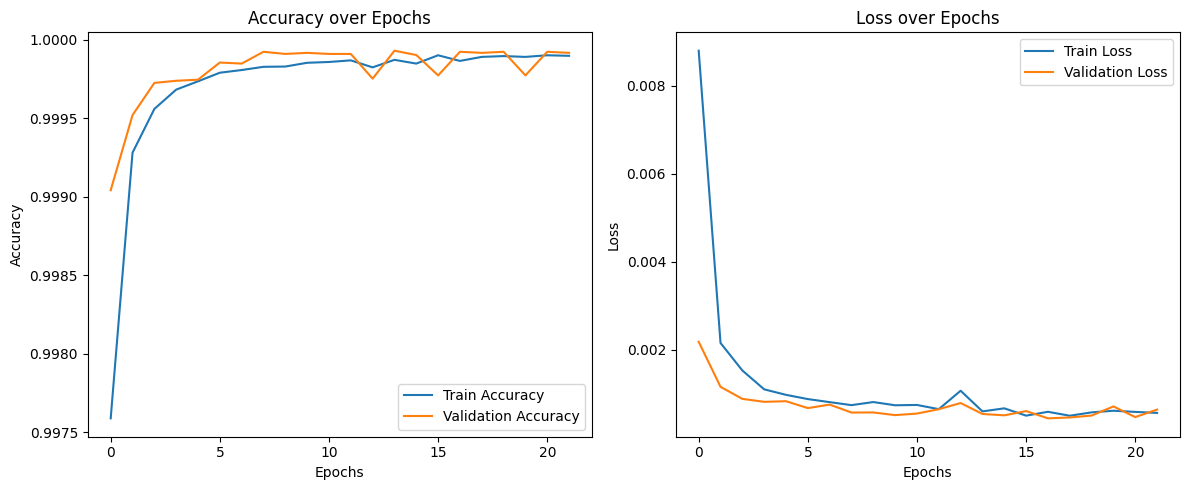

9795/9795 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step


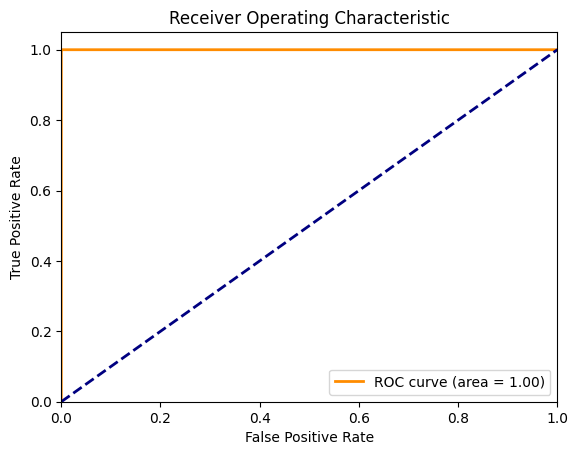

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert data to numpy arrays
X = df.values
y = target.values

# Reshape data for RNN (samples, timesteps, features)
# Using 1 timestep since we're not using sequence data
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Simple RNN Model
model = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    SimpleRNN(32),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train,
                   epochs=30,
                   batch_size=64,
                   validation_split=0.2,
                   callbacks=[early_stop])

# Evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ROC Curve (Bonus)
from sklearn.metrics import roc_curve, auc
y_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()